# Tag analysis
We are going to have a look at the tags used in our [60,000 questions from StackOverflow with Quality Rating](https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate). It should give us a better understanding of the situation and, with a bit of work, we might already be able to spot some trends.

## Introduction
In this article, we want to do a few things using the `Tags` field. We want to have a look at what the bulk of the questions are about but we also want to see if there are some common combinations. All this will eventually be confronted to the quality of the post to try and identify trends.

To that end, we are going to use the `lambda` function, build cleaning functions, build a bag of words, create a wordcloud and use nltk's `FreqDist`.

## Imports and cleaning functions
Nothing too fancy with the cleaning functions but the one we are going to use for our wordclouds is a little more invasive to try and get rid of some noise.

In [1]:
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (30,30)

df = pd.read_csv('./data/raw/data.csv', index_col='Id')

In [2]:
def wc(text):
    """
    Cleaning function to be used with our first wordcloud
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def clean_tags(text):
    """
    Cleaning function for tags
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'

## Wordclouds
`wordcloud()` needs a document of space-separated words. We are going to create a list of words then use the `' '.join()` method to build that document.

In [3]:
tags = [tag for i in df['Tags'].apply(lambda x: wc(x)) for tag in i.split()]

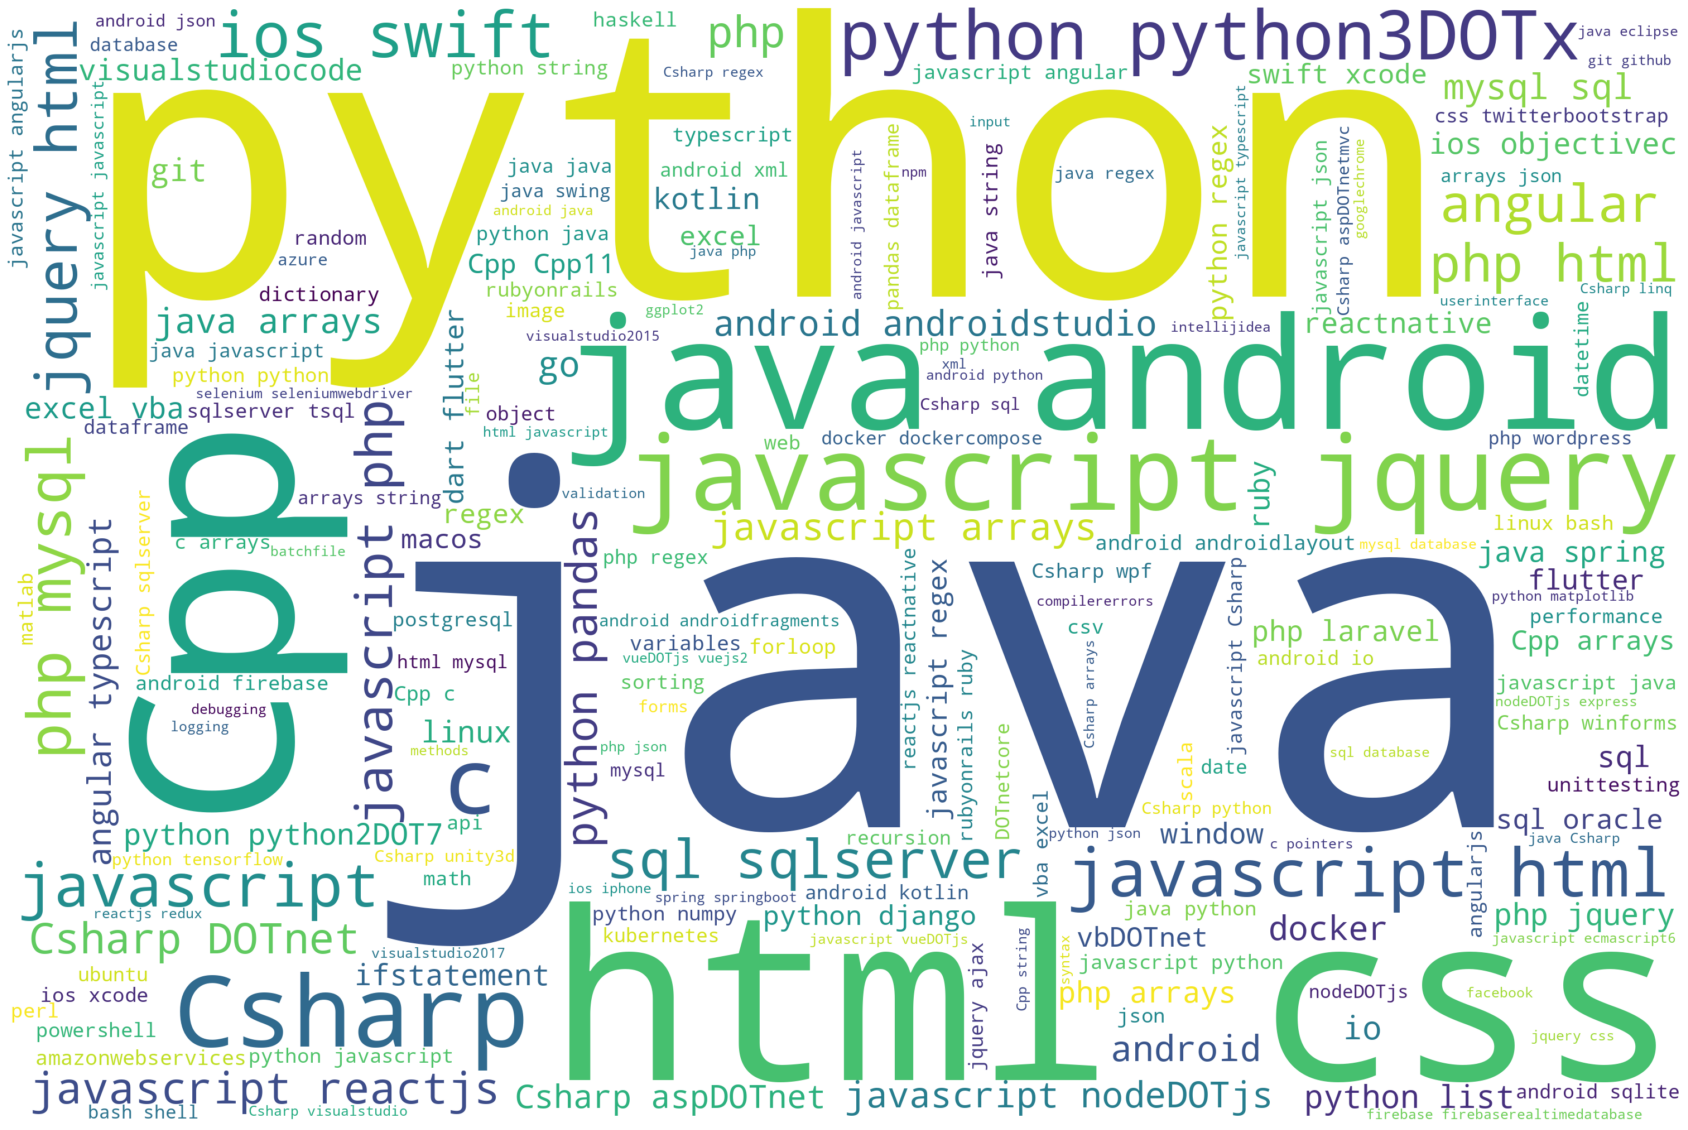

In [4]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      regexp = '\w+', # Allows C, R to be parsed as words
                      background_color = 'white'
                     )

wordcloud.generate(" ".join(tags))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
list(wordcloud.words_)[:20]

['java',
 'python',
 'html css',
 'Cpp',
 'java android',
 'javascript jquery',
 'Csharp',
 'c',
 'python python3DOTx',
 'javascript html',
 'ios swift',
 'javascript',
 'php mysql',
 'jquery html',
 'sql sqlserver',
 'angular',
 'php html',
 'javascript php',
 'javascript reactjs',
 'php']

We can see that although our list only contained single words, `wordcloud()` recognises some commonly paired ones.

A few things worth noticing as well:
- `java` and `python` seem to be the most asked about language, followed by `html css`.
- `javascript` seems to be quite high up as well but has been paired with other technologies like `html`,`jquery`, etc.
- Talking about pairs, we can already spot a few meaningful ones such as `java android` or less valuable like `python python 3.x`.

Let's look at the actual counts to see in which proportion those languages are talked about.

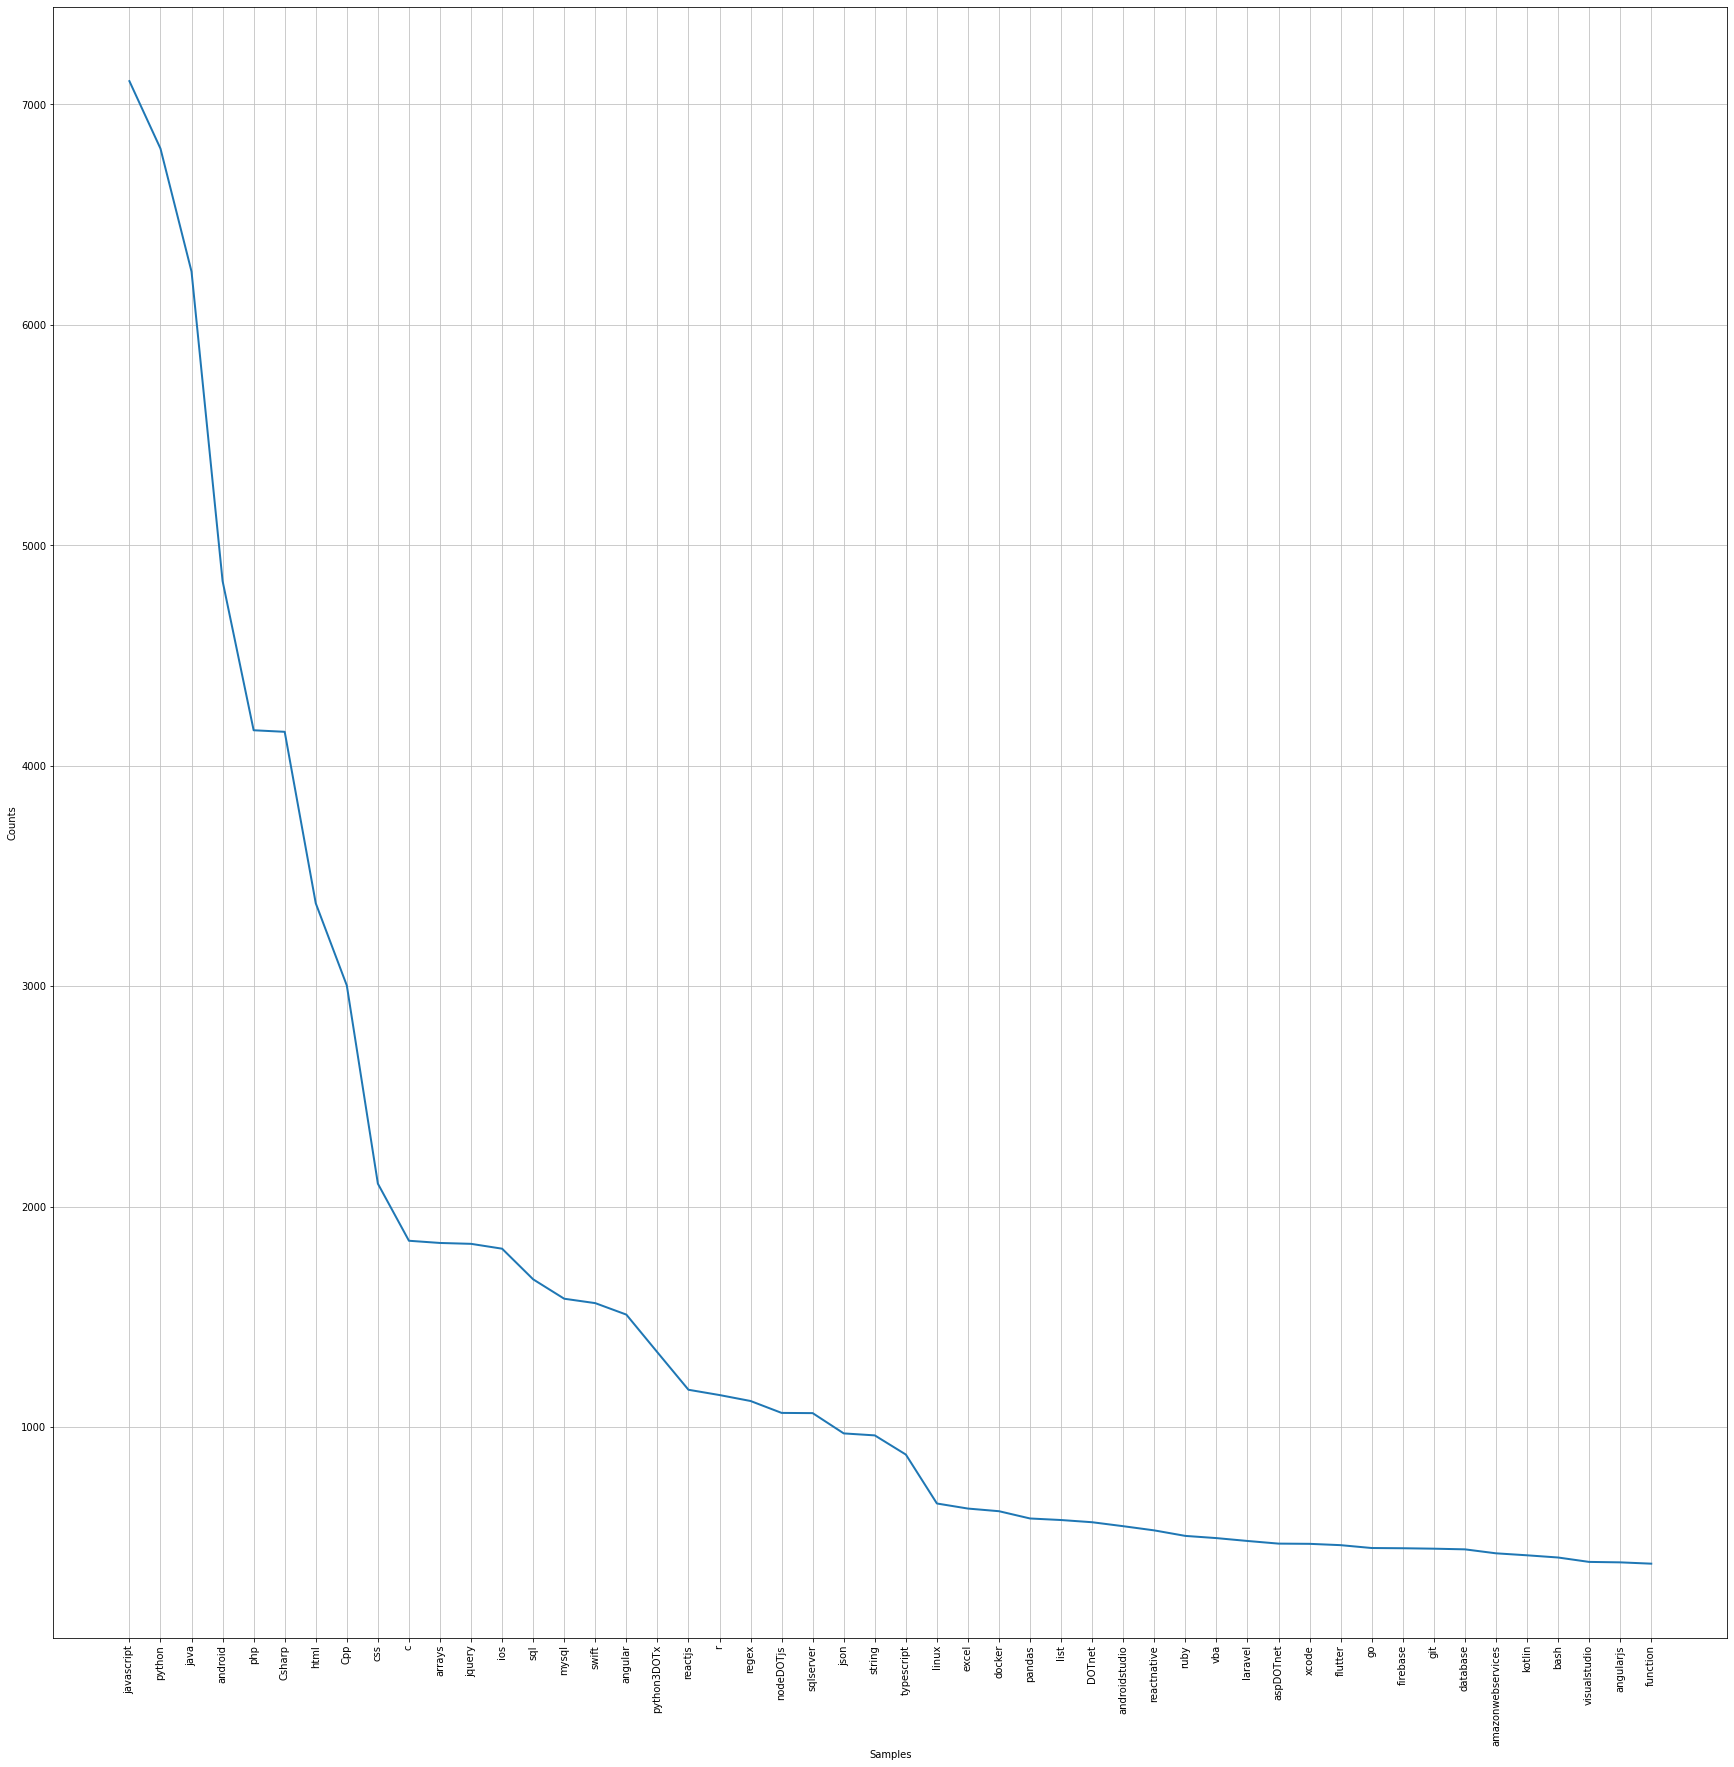

In [6]:
FreqDist(tags).plot(50)
plt.show()

It seems our assumption was correct, `javascript` is the most asked about language. But then `pyhon` overtakes `java` by a couple of hundred questions.

Let's double check this by reducing the list of tags to the first one only. We will assume programmers know how to tag a post, with the first tag being the core of the question, followed by other tags giving more context about the question.

In [7]:
first_tags = df['Tags'].apply(lambda x: wc(x)).apply(lambda x: x.split()[0])

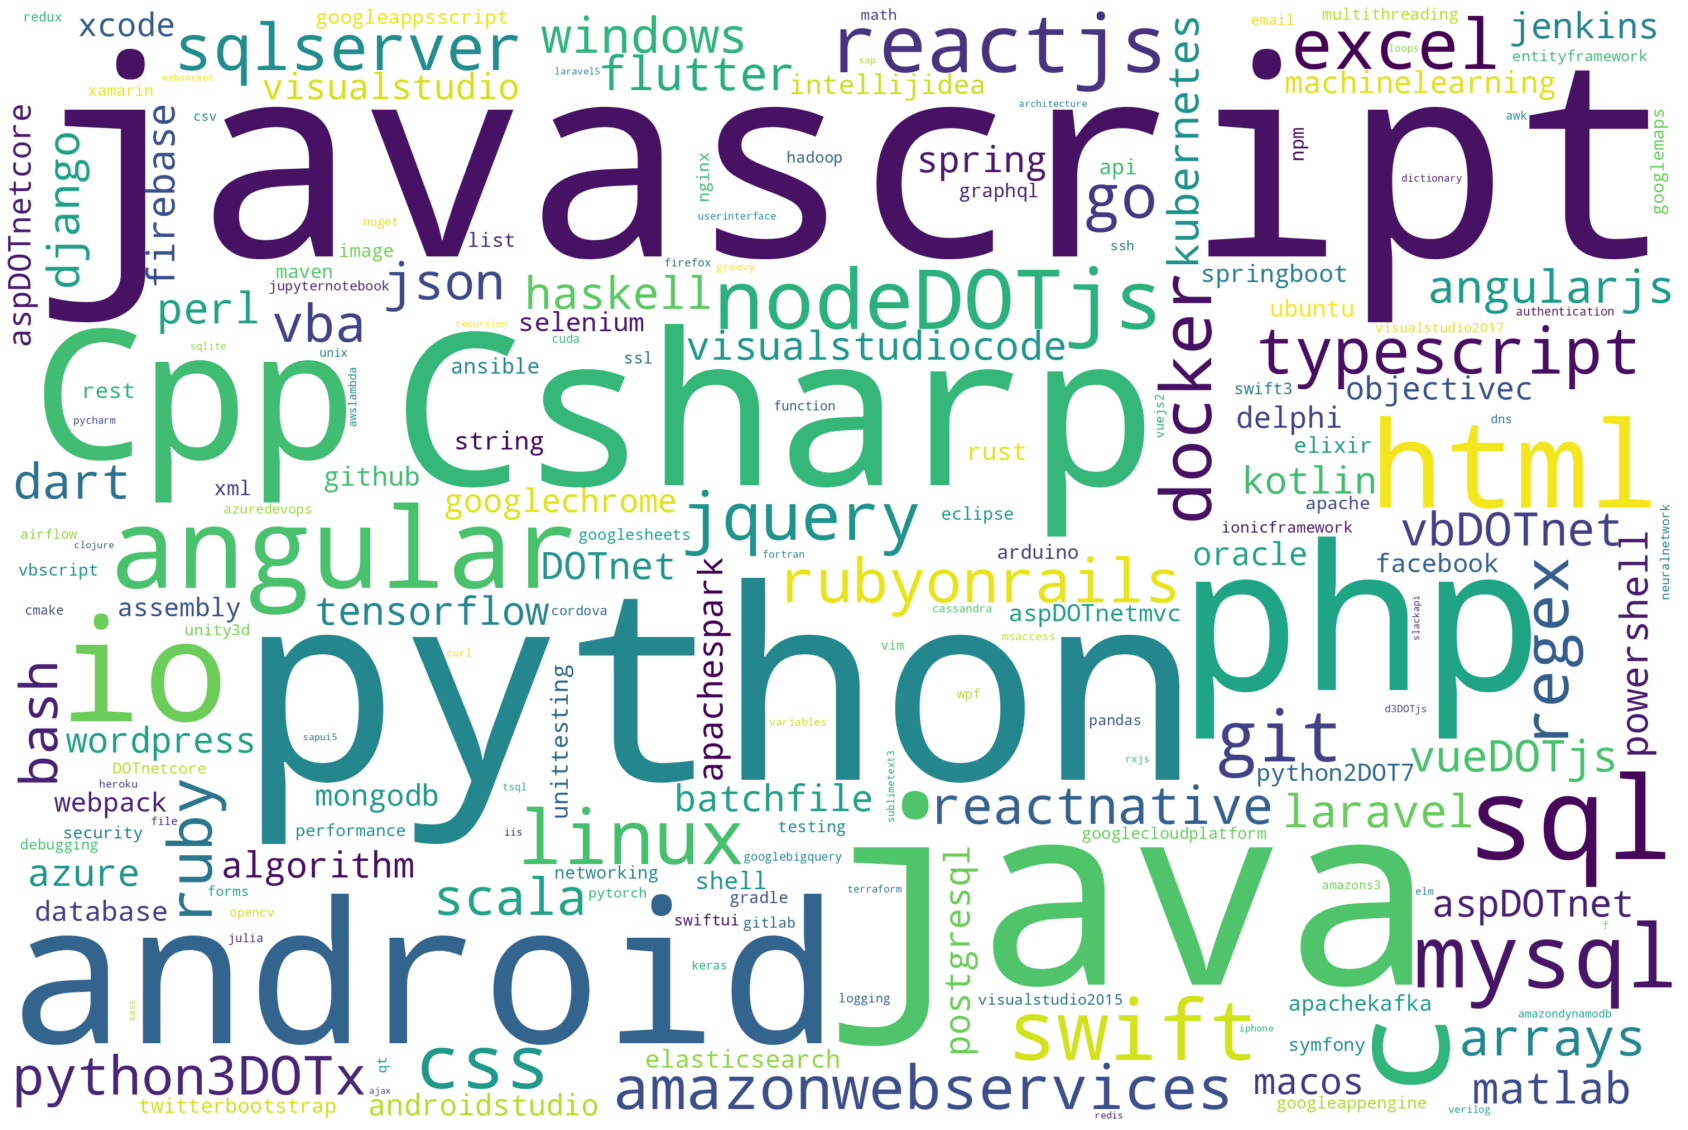

In [8]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      regexp = '\w+', # Allows C, R to be parsed as words
                      background_color = 'white'
                     )

wordcloud.generate(" ".join(first_tags))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
list(wordcloud.words_)[:20]

['javascript',
 'python',
 'java',
 'Csharp',
 'php',
 'android',
 'Cpp',
 'io',
 'c',
 'html',
 'sql',
 'angular',
 'mysql',
 'swift',
 'nodeDOTjs',
 'reactjs',
 'linux',
 'css',
 'docker',
 'git']

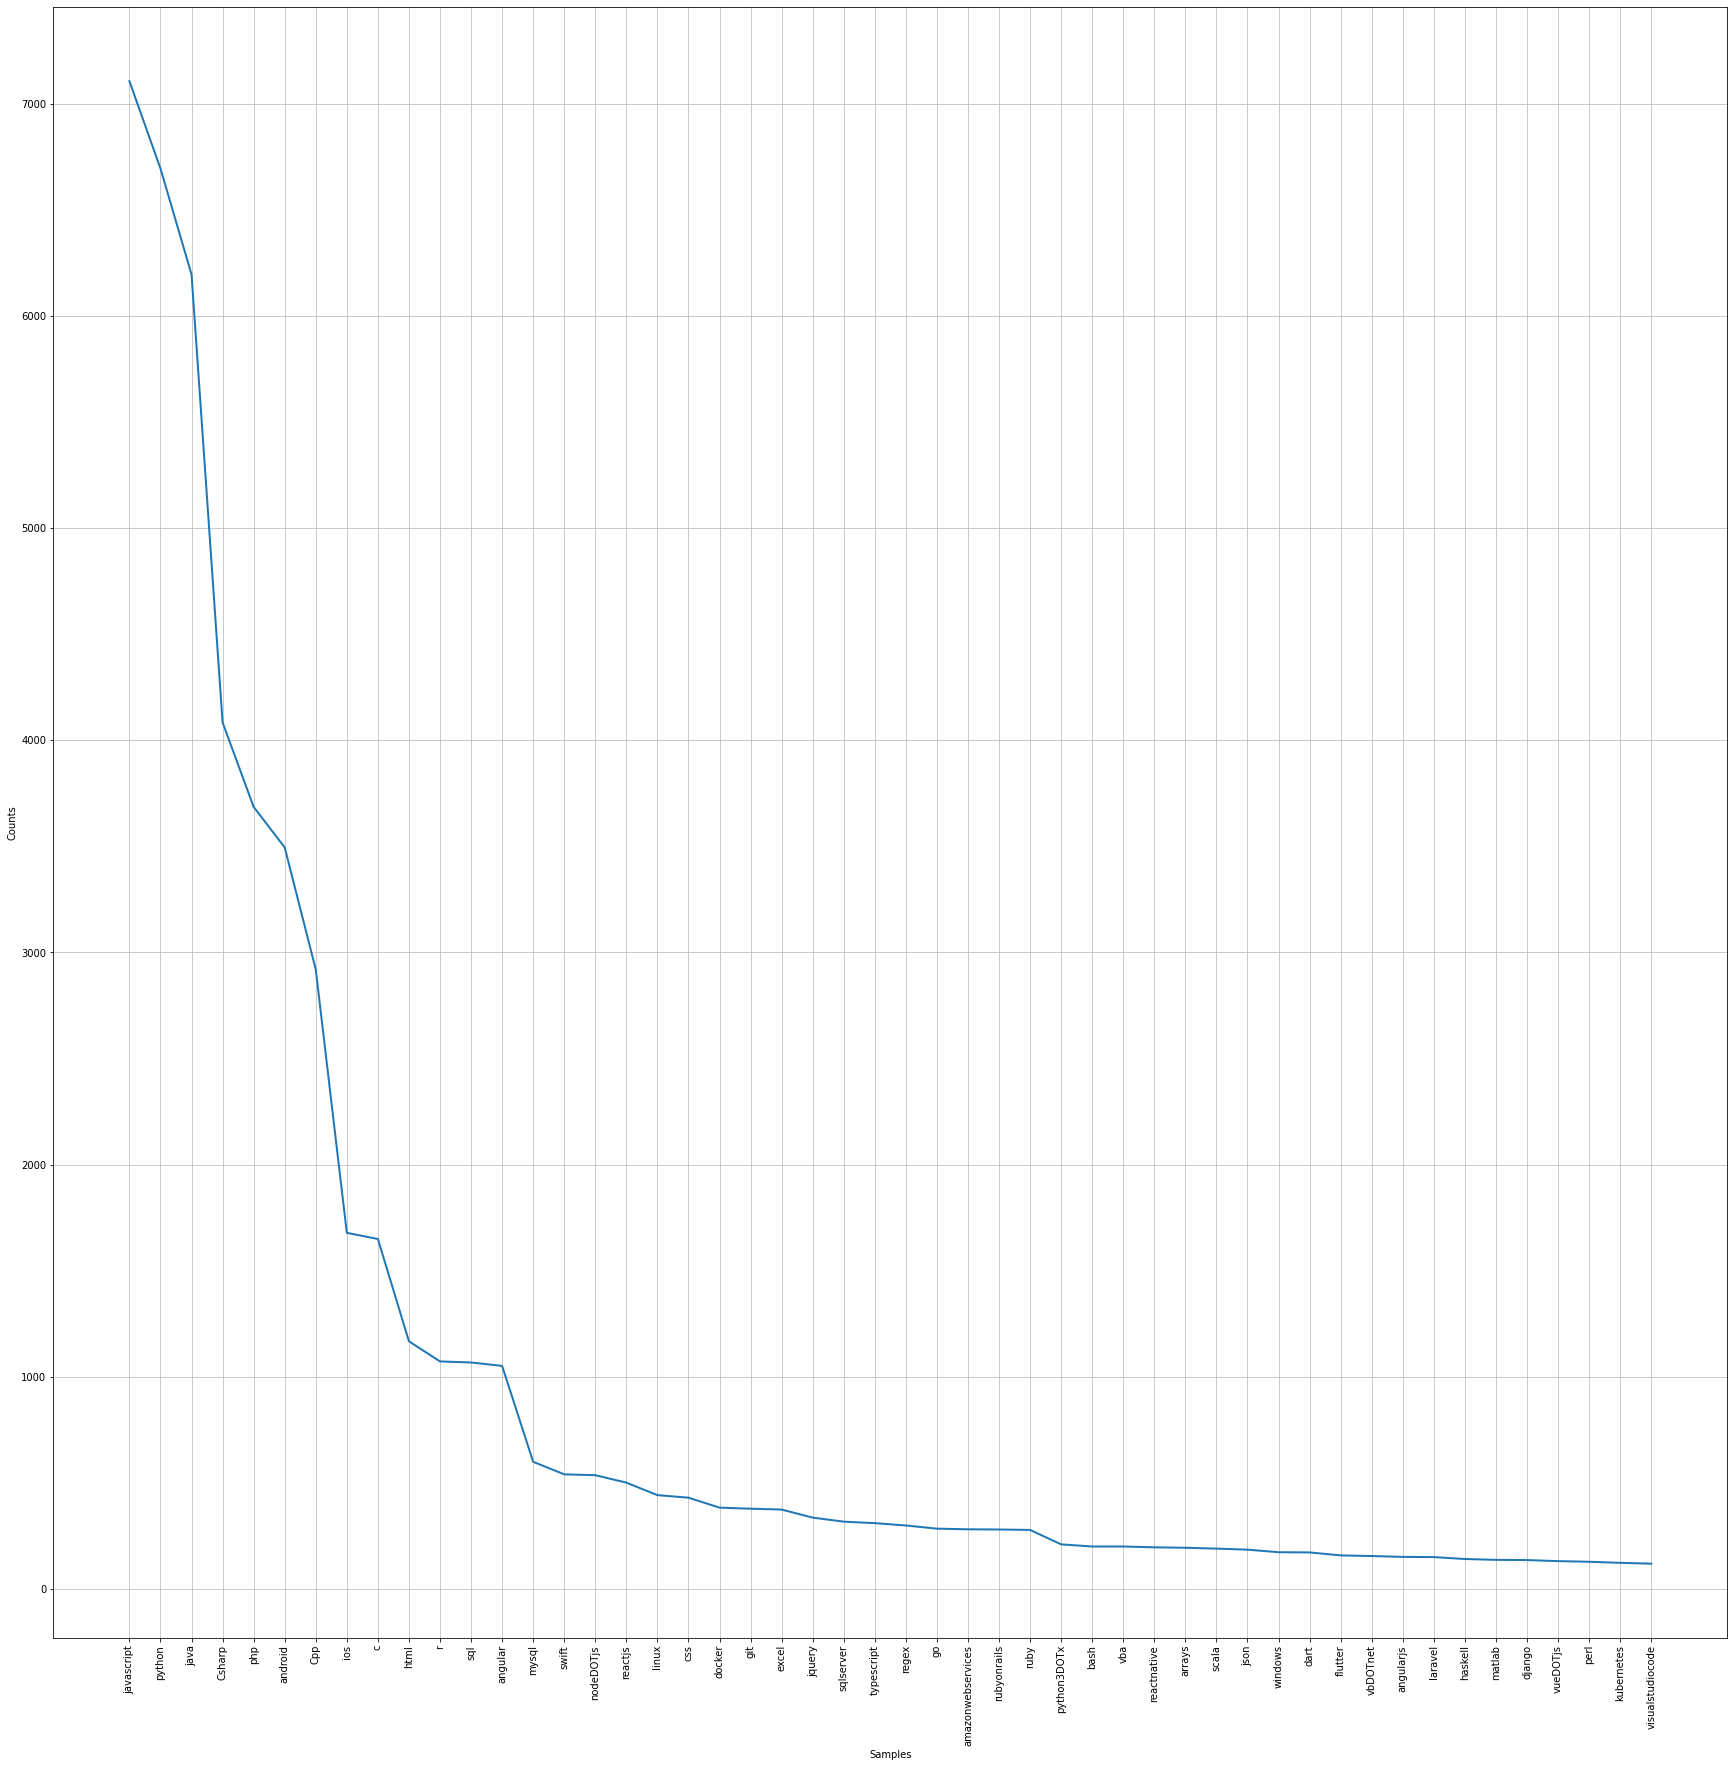

In [10]:
FreqDist(first_tags).plot(50)
plt.show()

So most questions on SO are about `javascript`, `python`, `java` and `c#`.

Let's have a deeper look at the top languages by taking a bag of words approach.
### Javascript

In [11]:
bag = {}
for tag in df['Tags'].apply(lambda x: clean_tags(x)):
    # Get the previous entry, or 0 if not yet documented; add 1
    bag[tag] = bag.get(tag, 0) + 1 

In [12]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'javascript' in words:
        print(words, bag[words])

javascript 879
javascript jquery 348
javascript html 260
javascript jquery html 156
javascript html css 148
javascript jquery html css 116
javascript arrays 114
javascript reactjs 113
javascript regex 111
javascript php 55
javascript node.js 54
javascript angularjs 52
javascript json 50
javascript php html 48
javascript ecmascript-6 45
javascript angular 34
javascript typescript 34
javascript css 33
javascript jquery css 28
javascript vue.js 26
javascript arrays json 25
javascript jquery ajax 23
javascript angular typescript 23
javascript php jquery 20
javascript lodash 20
javascript jquery json 20
javascript php jquery html 17
javascript arrays sorting 17
javascript date 16
javascript php jquery ajax 16
javascript reactjs react-hooks 16
javascript reactjs react-native 15
javascript webpack 15
javascript vue.js vuejs2 15
javascript php html css 14
javascript momentjs 14
javascript arrays object 14
javascript google-maps 13
javascript object 13
javascript react-native 13
javascript reac

javascript tampermonkey 1
javascript symfony highcharts twig 1
javascript jquery html css pageload 1
javascript reactjs babeljs 1
javascript android json api 1
javascript angular angular2-template 1
javascript visual-studio typescript visual-studio-code visual-studio-2017 1
javascript php variables 1
javascript notifications web-push 1
javascript jquery html iframe 1
javascript html css layout 1
javascript perl pack 1
javascript node.js firebase firebase-cloud-messaging 1
javascript wordpress wordpress-theming wordpress-thesis-theme 1
javascript angularjs angular-ui-bootstrap mask input-field 1
javascript google-chrome-extension async-await 1
javascript sinon 1
javascript typescript declare 1
javascript api ecmascript-6 ecmascript-7 1
javascript file url blob firebase-storage 1
javascript git npm pre-commit-hook 1
javascript node.js firebase google-cloud-functions 1
javascript regex regula 1
javascript jquery html xml 1
javascript jquery html forms button 1
javascript import module ecm

Javascript is usually associated with `jquery`, `html` and `css`. `reactjs` and `regex` are also worth noticing but if you were thinking about a webdev career, I guess now you know where to start :)

### Python

In [13]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'python' in words:
        print(words, bag[words])

python 1068
python python-3.x 375
python pandas 155
python regex 98
python list 86
python python-2.7 77
python-3.x 72
python django 53
python dictionary 44
python numpy 43
python pandas dataframe 41
python matplotlib 40
python tkinter 37
python string 31
python tensorflow 29
python list dictionary 27
python python-2.7 python-3.x 24
python arrays numpy 23
python function 20
python python-3.x python-2.7 20
python opencv 19
python json 19
python csv 18
python python-3.x tkinter 18
python python-3.x list 18
python flask 16
python arrays 16
python selenium 16
python pandas numpy 15
python pytest 13
python if-statement 13
python pygame 13
python regex python-3.x 13
python python-3.x dictionary 13
python algorithm 12
python syntax 12
python file 12
python linux 12
python pycharm 11
python scikit-learn 11
python string list 11
python turtle-graphics 11
python list list-comprehension 10
python beautifulsoup 10
python anaconda 10
python airflow 10
python pip 9
python datetime 9
python apache-spa

python ssl ssl-certificate python-requests 1
python numpy histogram 1
python python-2.7 google-cloud-storage google-cloud-platform 1
java python algorithm list 1
python json dictionary merge 1
python excel xlwings 1
python c++ c node.js linux 1
python icons pyqt5 qmainwindow python-3.6 1
python windows openai-gym 1
python selenium selenium-chromedriver chromium headless-browser 1
python python-3.x tree binary-tree 1
python fibonacci 1
python amazon-ec2 deployment flask amazon-elastic-beanstalk 1
python tokenize lexical-analysis 1
php python text nlp language-detection 1
python boto3 1
python pytest joblib 1
python r numpy statistics statsmodels 1
python matplotlib scatter-plot 1
python location coordinates latitude-longitude area 1
python python-3.x user-interface jupyter-notebook jupyter 1
python doctest 1
python text raspberry-pi3 1
python validation integer range 1
python elasticsearch elasticsearch-dsl elasticsearch-py 1
python-3.x type-hinting 1
python pycharm conda 1
python machi

python python-3.x project 1
python string date 1
python function if-statement arguments 1
python pycharm jupyter-notebook jupyter 1
python operating-system 1
python jupyter-notebook openpyxl 1
python json regex python-3.x 1
python performance built-in 1
python sqlalchemy mypy 1
python list class constructor 1
python django django-forms 1
python sql ms-access odbc pyodbc 1
python matrix cuda matrix-inverse pycuda 1
python tensorflow conda 1
python python-datetime 1
python pandas deep-learning 1
python modulus 1
python-3.x dictionary 1
python mysql-workbench 1
python with-statement 1
python sqlite parsing 1
python constructor 1
python encode cjk 1
python typeerror class-instance-variables 1
python tensorflow neural-network mnist 1
python oracle hash 1
python pygobject pango 1
python keras deep-learning conv-neural-network dcgan 1
python-3.x pip setup.py pyaudio 1
python pip conda package-managers 1
python html django 1
python tensorflow-hub tensorflow2.0 1
python syntax python-2.x 1
pyth

We can see `pandas`, `regex`, `lists` and `dictionaries` are troubling pythonistas. `django` and `tkinter` are also up there but the bulk of people posting questions on Stack Overflow are working on data analysis / data science projects.

### Java

In [14]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'java' in words and 'javascript' not in words:
        print(words, bag[words])

java 1013
java android 339
java arrays 100
java string 60
java regex 55
java android android-studio 45
java arraylist 34
java eclipse 28
java swing 24
java android xml 22
java java-8 20
java javafx 20
java collections 20
java java-8 java-stream 19
java android json 19
java for-loop 17
java android sqlite 17
java selenium 17
java algorithm 15
java spring spring-boot 15
java spring 15
java recursion 15
java generics 15
java json 15
java multithreading 15
java java.util.scanner 14
java if-statement 14
java android firebase firebase-realtime-database 14
java arrays arraylist 13
java android android-layout 13
java methods 12
java oop 12
java android nullpointerexception 12
java file 12
java arrays string 12
java android kotlin 12
java android android-fragments 11
java exception 11
java mysql 11
java nullpointerexception 11
java loops 11
java java-stream 11
java random 11
java android sqlite android-sqlite 10
java android-studio 10
java date 10
java hashmap 10
java c++ 10
java linked-list 10

java interpolation curve cubic-spline 1
java compilation server 1
java arrays string append 1
java performance csv servlets 1
android retrofit rx-java okhttp 1
java deep-copy 1
java spring-mvc spring-security spring-boot spring-security-oauth2 1
java maven sonarqube 1
java stack 1
java parameters parameter-passing optional-parameters 1
java android android-layout android-studio android-sliding 1
java asterisk fastagi 1
java oracle 1
java swing jwindow 1
java batch-file command-line 1
java swing jframe jpanel java-2d 1
java image pixel grayscale 1
java exception-handling compiler-errors 1
java arraylist filereader 1
java arrays sorting time 1
java arrays database vector data-structures 1
java spring spring-boot spring-annotations component-scan 1
java java-deployment-toolkit 1
java-8 log4j2 kotlin 1
java swing jbutton jlist 1
java loops recursion 1
java android android-studio nullpointerexception 1
java android google-app-engine 1
android eclipse r.java-file 1
java android json firebase

java generics collections hashmap 1
java android sqlite search cursor 1
java arrays int indexoutofboundsexception 1
java ubuntu sdkman 1
java mapstruct 1
java jvm openjdk jvm-hotspot hotspot 1
java ternary negative-integer 1
java facebook facebook-graph-api 1
java spring hibernate jpa spring-boot 1
java exit palindrome 1
java xml simpledateformat datetime-parsing 1
java android google-play android-app-signing 1
java string date parsing 1
java bash macos gradle 1
java casting floating-point 1
java inheritance delegation 1
java arraylist collections merge 1
java android eclipse android-fragments import 1
java mysql arrays 1
java spring maven junit logback 1
java android sqlite android-studio 1
java oop interface abstract-class 1
java c# oop 1
java spring spring-cache 1
java rest modelmapper 1
java class variables 1
java abstract-class clone 1
java shapes 1
java android algorithm 1
java android messaging 1
java hashmap hashtable hashset 1
java image image-processing image-compression goog

java intellij-idea minecraft bungeecord 1
java android loops 1
java android string list classcastexception 1
java hibernate maven annotations 1
java android arrays object initialization 1
java arrays object syntax new-operator 1
java android image image-processing imageview 1
java java-9 graalvm java-10 1
java android sql sqlite 1
java spring spring-boot spring-cloud-stream 1
java android nullpointerexception android-fragmentactivity android-context 1
java android android-source 1
java json xml bean-validation 1
java android android-room 1
java android android-studio fonts textview 1
java methods lambda interface kotlin 1
android private-key android-keystore android-security java-security 1
java date datetime datetime-format date-formatting 1
docker java-8 debian debian-jessie 1
java azure kubernetes fabric8 1
java spring rest spring-security httpresponse 1
java android android-recyclerview nullpointerexception 1
java return kotlin 1
java android android-intent crash 1
java android mys

java java-8 java-stream collect 1
java android json api android-videoview 1
java if-statement while-loop java.util.scanner 1
java android textview android-spinner 1
java architecture localdate zoneddatetime 1
java testing integration-testing 1
java for-loop foreach 1
java android image 1
java oop variables 1
java application-design 1
java spring-boot jpa spring-data-jpa spring-data 1
java html css jakarta-ee 1
java arrays if-statement recursion binary-search-tree 1
java logging log4j retention 1
java datetime timestamp 1
java arrays collections 1
java sql-server swing jbutton 1
java switch-statement java-13 1
java swift kotlin 1
java go 1
java sql sql-server jdbc 1
java arrays memory memory-leaks 1
java selenium selenium-webdriver webdriver java-13 1
java path 1
java datetime-format epoch 1
java generics singly-linked-list 1
java netbeans bluej 1
java eclipse-rcp nattable 1
java character-encoding 1
java android-studio url 1
java android kotlin flutter 1
java oop object methods 1
java 

On SO, the `java` community seems to be significantly focused on `android` and `java-8` development. Most of the question being about fundamentals of `java`: `arrays`, `string`, `arraylist`, `for-loop`.
## Quality
Is there any link between the topic of a question and its quality?
### Javascript

In [15]:
df[df['Tags'].str.contains('javascript')]['Y'].value_counts()/71.13

LQ_CLOSE    41.557711
LQ_EDIT     31.224518
HQ          27.217770
Name: Y, dtype: float64

### Python

In [16]:
df[df['Tags'].str.contains('python')]['Y'].value_counts()/71.62

LQ_CLOSE    37.042725
LQ_EDIT     33.077353
HQ          29.879922
Name: Y, dtype: float64

### Java

In [17]:
df[~df['Tags'].str.contains('javascript')][df['Tags'].str.contains('java')]['Y'].value_counts()/62.94

<ipython-input-17-5f0901101a87>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~df['Tags'].str.contains('javascript')][df['Tags'].str.contains('java')]['Y'].value_counts()/62.94


LQ_CLOSE    44.582142
LQ_EDIT     38.163330
HQ          17.254528
Name: Y, dtype: float64

No clear trend is appearing here. Pyhton seems to have slightly more high quality questions than Javascript but the bulk of it is low quality. Interestingly Java has significantly less high quality questions.
## Conclusion
There doesn't seem to be any obvious correlation between the quality of the questions and the tags used. It might be worth digging a little more to identify tags combination that could be more "high value" but it would only explain a very minimal fraction of the questions posted. It is definitely not worth spending more time on this type of analysis.

We have learnt a few things about Stack Overflow though!

Javascript is the most asked about language, followed by Python then Java. Javascript, jquery and html seem to be the most talked about topics. Python's community is mainly developers and data scientist/analysts, whilst Java seems to attract a lot of low quality questions and android seem to be one of the most hype java applications.